In [27]:
import os,sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from plotnine import *
import re
import glob

In [26]:
path_macs = '/Users/chandrima.modak/Gladstone Dropbox/Chandrima Modak/macs_perturbseq_analysis'
folders =  [folder for folder in os.listdir(path_macs)
           if folder.startswith('Mac')]
folders =  sorted(folders)
df_ctrls = []
df_lps = []
for folder in folders:
    pattern = glob.glob(os.path.join(path_macs, folder, 'guide_assigned.csv'))[0]
    df_cell = pd.read_csv(pattern)
    if 'Ctrl' in folder:
        df_ctrls.append(df_cell)
    else:
        df_lps.append(df_cell)

In [28]:
df_cell_ctrl = pd.concat(df_ctrls, axis = 0)
df_cell_lps = pd.concat(df_lps, axis= 0)

In [29]:
df_guide_ctrl = pd.DataFrame(df_cell_ctrl.groupby('cell').size(), columns=['number_of_guides'])
df_guide_ctrl['type'] = 'Ctrl'
df_guide_lps = pd.DataFrame(df_cell_lps.groupby('cell').size(), columns=['number_of_guides'])
df_guide_lps['type'] = 'LPS'
df_guide = pd.concat([df_guide_ctrl, df_guide_lps], axis = 0 )

In [31]:
plt_path = '/Users/chandrima.modak/Gladstone Dropbox/Chandrima Modak/macs_perturbseq_analysis/plots'

/Users/chandrima.modak/ron_perturb_seq_analysis/gw_CRISPRa_Chandrima/branch_code_env/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/chandrima.modak/ron_perturb_seq_analysis/gw_CRISPRa_Chandrima/branch_code_env/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: /Users/chandrima.modak/Gladstone Dropbox/Chandrima Modak/macs_perturbseq_analysis/plots/guides_count_per_cell.png


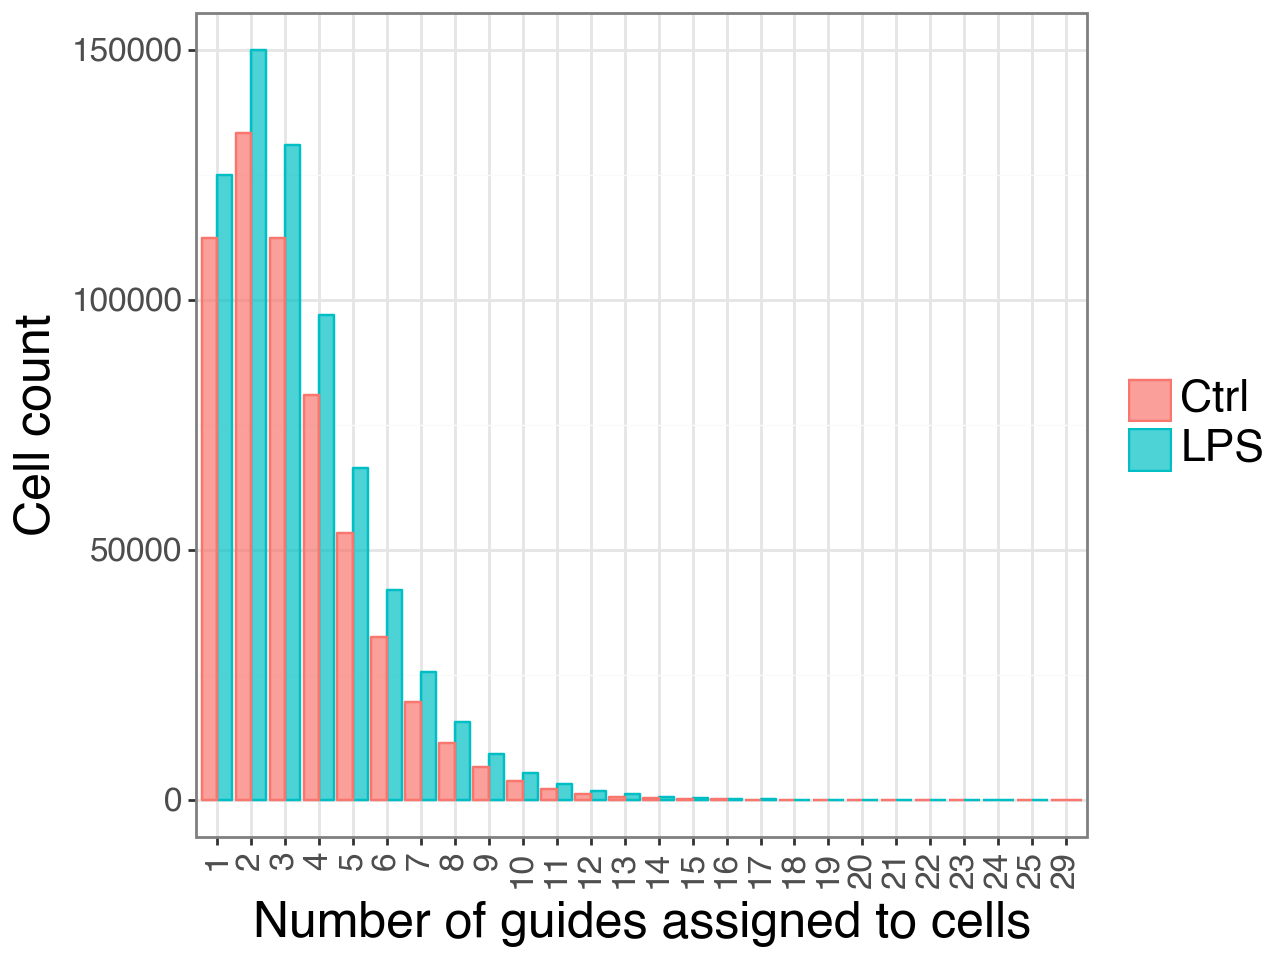

In [32]:
p = (
    ggplot(df_guide, aes(x='factor(number_of_guides)', fill='type')) 
    + geom_bar(aes(color='type'), alpha=0.7, position='dodge')
    + labs(x='Number of guides assigned to cells', 
           y='Cell count')
    + theme_bw()
    + theme(legend_title=element_blank(),
           legend_text = element_text(size = 16))
    +theme(
            plot_title = element_text(size = 16, face = "bold"),
            axis_title_x = element_text(size = 18),
            axis_title_y = element_text(size = 18),
            axis_text_x = element_text(size = 12,angle = 90), # Size of tick labels
            axis_text_y = element_text(size = 12)  # Size of tick labels
              )
)
p.save(os.path.join(plt_path, 'guides_count_per_cell.png'), dpi= 150)
p.show()
